In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv ("C:\\Users\\nilli\\Downloads\\house-prices-advanced-regression-techniques\\train.csv")
print(df.head(2))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  

[2 rows x 81 columns]


In [3]:
#df.columns
#df.info

In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
print(df.dtypes == object)

Id               False
MSSubClass       False
MSZoning          True
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType          True
SaleCondition     True
SalePrice        False
Length: 81, dtype: bool


In [6]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
dfn = df[['Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']]
dfn

,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
dfn.columns


Index(['Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [9]:
dfn.dtypes

Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
GarageQual        object
GarageCond        object
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
PoolQC            object
Fence             object
MiscFeature       object
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
dtype: object

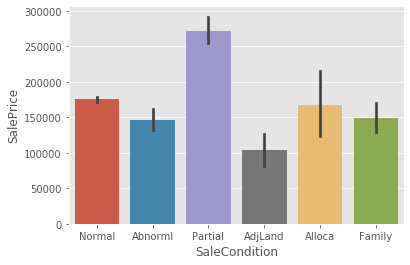

In [10]:
#dfn['FireplaceQu'].nunique
sns.barplot(x="SaleCondition", 
y="SalePrice", 
#hue="SalePrice",
data=dfn)

In [11]:
#dfn.corr()


In [12]:
# dfn[['Fireplaces','GarageYrBlt',
#        'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
#        'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
#        'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
#        'MoSold', 'YrSold',  'SalePrice']]

In [13]:
'SaleType', 'SaleCondition', 'FireplaceQu', 'GarageType'

('SaleType', 'SaleCondition', 'FireplaceQu', 'GarageType')

In [14]:
dfn2 =dfn.select_dtypes(include =['float', 'int64'])
dfn2.corr()

,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Fireplaces,1.000000,0.046822,0.300789,0.269141,0.200019,0.169405,-0.024822,0.011257,0.184530,0.095074,0.001409,0.046357,-0.024096,0.466929
GarageYrBlt,0.046822,1.000000,0.588920,0.564567,0.224577,0.228425,-0.297003,0.023544,-0.075418,-0.014501,-0.032417,0.005337,-0.001014,0.486362
GarageCars,0.300789,0.588920,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.269141,0.564567,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
WoodDeckSF,0.200019,0.224577,0.226342,0.224666,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.021011,0.022270,0.324413
OpenPorchSF,0.169405,0.228425,0.213569,0.241435,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.071255,-0.057619,0.315856
EnclosedPorch,-0.024822,-0.297003,-0.151434,-0.121777,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,0.011257,0.023544,0.035765,0.035087,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,0.184530,-0.075418,0.050494,0.051412,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447
PoolArea,0.095074,-0.014501,0.020934,0.061047,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404


## univariate analysis


Remove:GarageArea, Fireplace,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch, 3SsnPorch,
    ScreenPorch, PoolArea, MiscVal, MoSold, YrSold
Not Sure:
Keep:  GarageCars  

In [15]:
#descriptive statistics summary
dfn['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [515]:
# # sns.lineplot(x="YrSold", y="SalePrice", 
# # data=df,hue="Neighborhood")

# import plotly.express as px

# df = px.data.gapminder().query("Neighborhood")
# fig = px.line(df, x="YrSold", y="SalePrice")
# fig.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E0B613FC8>,
      dtype=object)

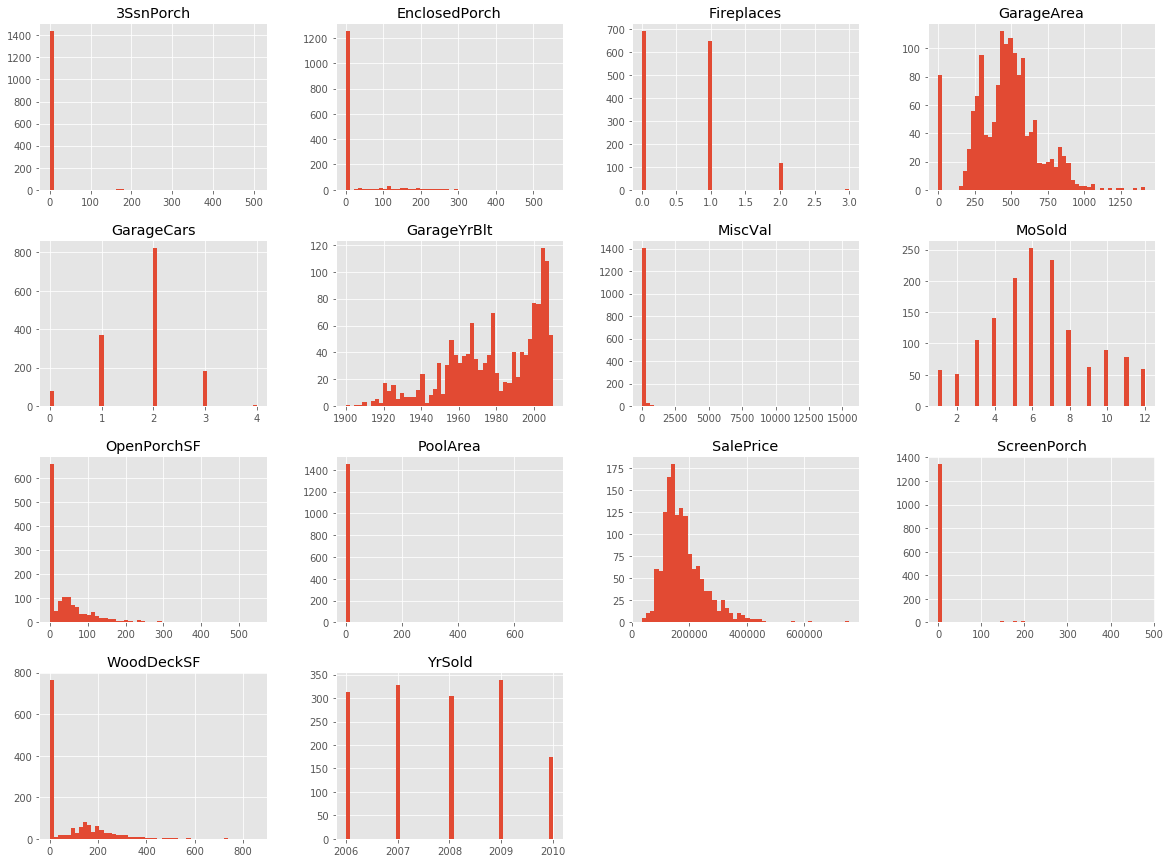

In [16]:
dfn2.hist(bins=50, figsize=(20,15))

In [17]:
#dfn2.plot(kind ="scatter", figsize=(20,15))

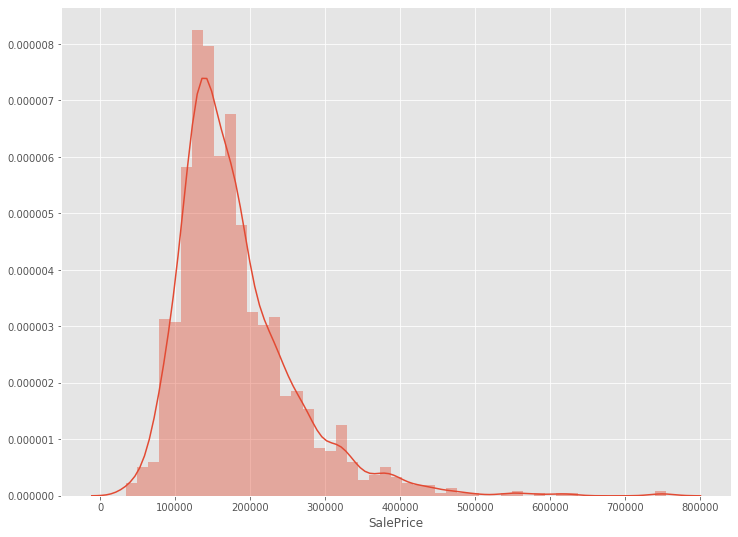

In [18]:
#histogram
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(dfn['SalePrice']);

median house price sale is 163000  deistribution sqwueked right.

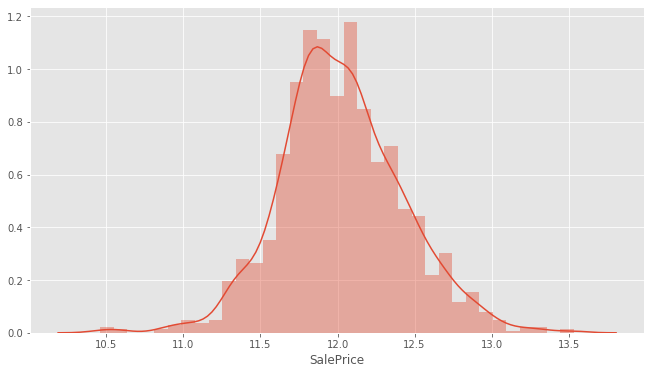

In [19]:
f, ax = plt.subplots(figsize=(11, 6))
sns.distplot(np.log(dfn['SalePrice']))

In [20]:
#saleprice correlation matrix
#k = 10 #number of variables for heatmap
#cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#cm = np.corrcoef(df_train[cols].values.T)
#sns.set(font_scale=1.25)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#plt.show()

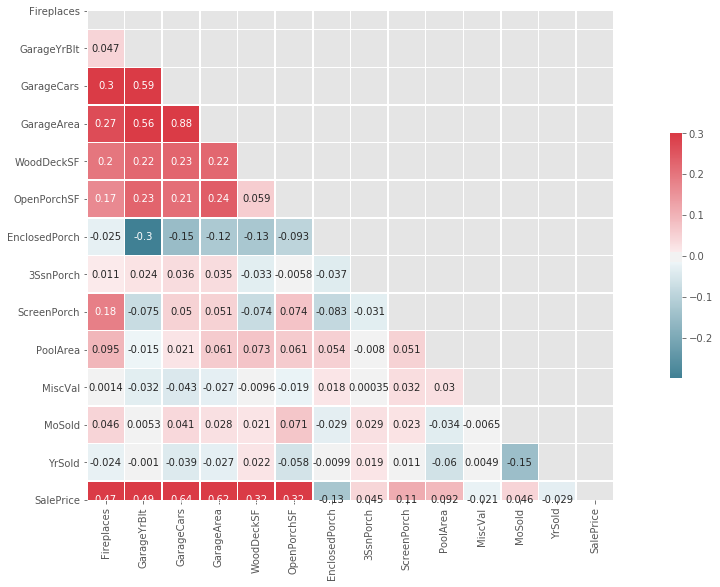

In [21]:
# Generate a mask for the upper triangle  # using np.tril will mask the lower triangle
mask = np.triu(np.ones_like(dfn2.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap  # annot =True shows the correlation values
sns.heatmap(dfn2.corr(), vmax=.3, center=0,
            square=True, linewidths=.5, mask=mask, cmap=cmap, annot=True,annot_kws={'size': 10},cbar_kws={"shrink": .5})

garageCars and Garageyrbuilt seems to be mullticollinear, garage area and garageCars too

Fireplaces, Garageyrbuilt,garage area garage cars,( woodeck, open porchsf correlation of .32 so may be dropped)

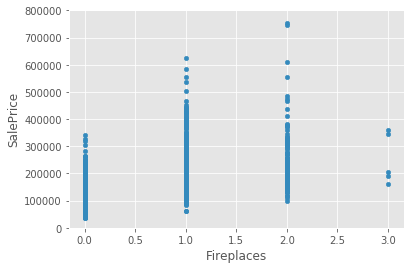

In [22]:
#relationship with numerical variables#scatter plot Fireplaces/saleprice
feat = 'Fireplaces'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
data.plot.scatter(x=feat, y='SalePrice', ylim=(0,800000));


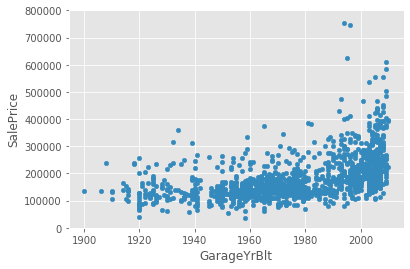

In [23]:
# scatter plot 'GarageYrBlt/saleprice
feat = 'GarageYrBlt'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
data.plot.scatter(x=feat, y='SalePrice', ylim=(0,800000));

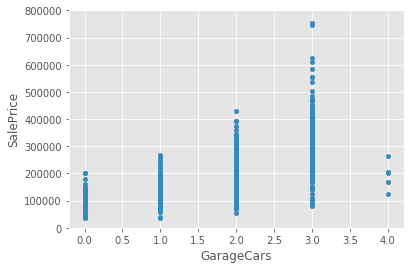

In [24]:
# scatter plot 'GarageCars/saleprice discrete
feat = 'GarageCars'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
data.plot.scatter(x=feat, y='SalePrice', ylim=(0,800000));

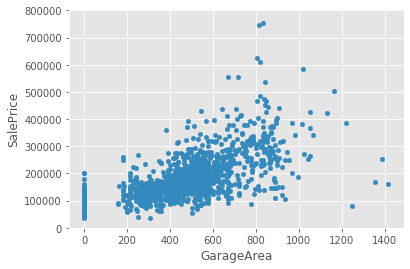

In [25]:
# scatter plot 'GarageArea'/saleprice
feat = 'GarageArea'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
data.plot.scatter(x=feat, y='SalePrice', ylim=(0,800000));

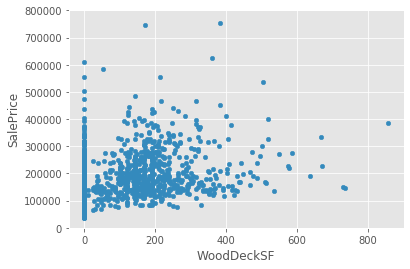

In [26]:
# scatter plot 'WoodDeckSF'/saleprice
feat = 'WoodDeckSF'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
data.plot.scatter(x=feat, y='SalePrice', ylim=(0,800000));

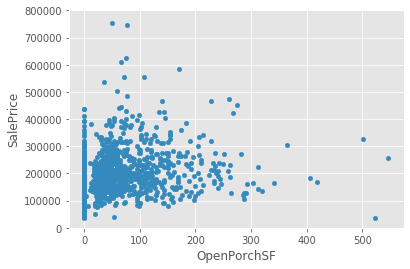

In [27]:
# scatter plot 'OpenPorchSF/saleprice
feat = 'OpenPorchSF'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
data.plot.scatter(x=feat, y='SalePrice', ylim=(0,800000));

In [28]:
dfn3 =dfn.select_dtypes(include =["object"])
dfn3


,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


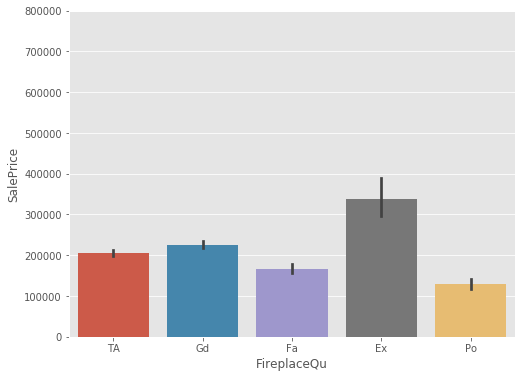

In [29]:
#relationship with categorical variables#box plot FireplaceQu/saleprice
feat = 'FireplaceQu'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#plt.xticks(rotation=90);

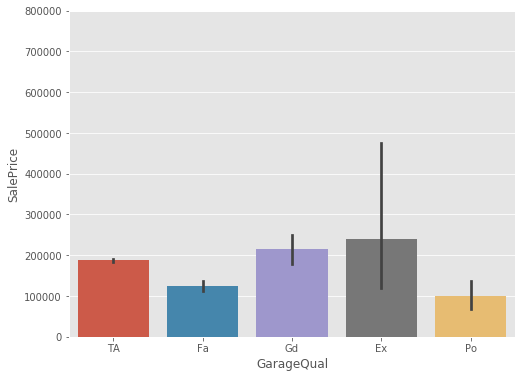

In [30]:
#relationship with categorical variables#box plot GarageQual/saleprice
feat = 'GarageQual'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

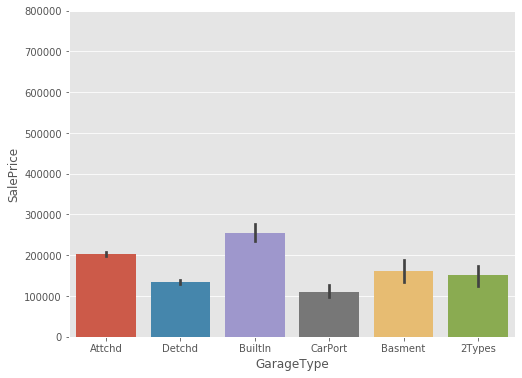

In [31]:
#relationship with categorical variables#box plot GarageType/saleprice
feat = 'GarageType'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

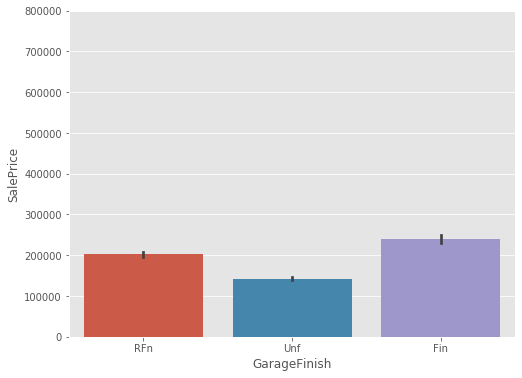

In [32]:
#relationship with categorical variables#box plot GarageFinish/saleprice
feat = 'GarageFinish'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

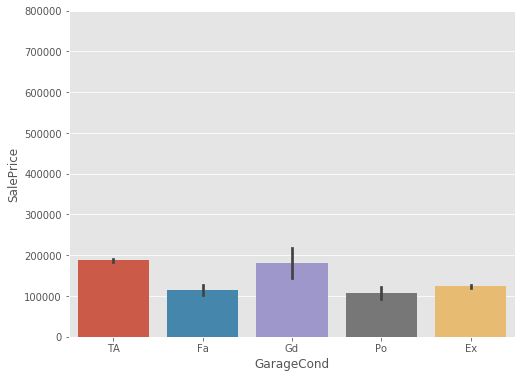

In [33]:
#relationship with categorical variables#box plot GarageCond/saleprice
feat = 'GarageCond'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

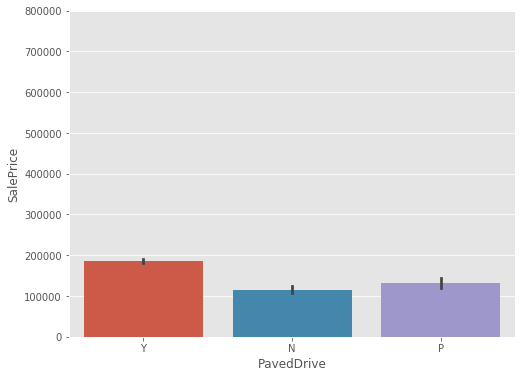

In [34]:
#relationship with categorical variables#box plot PavedDrive/saleprice
feat = 'PavedDrive'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

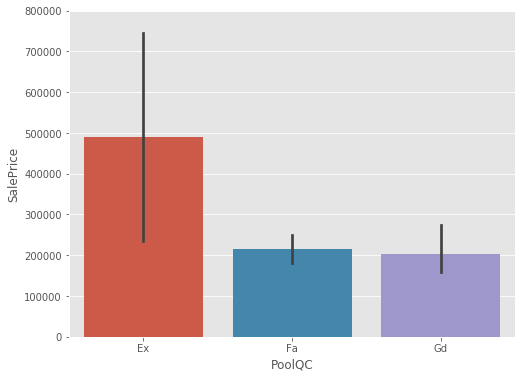

In [35]:
#relationship with categorical variables#box plot PoolQC/saleprice
feat = 'PoolQC'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

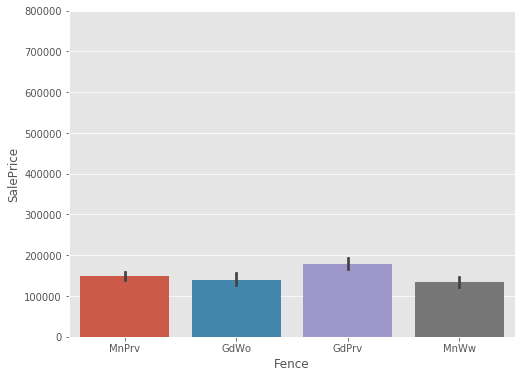

In [36]:
#relationship with categorical variables#box plot Fence/saleprice
feat = 'Fence'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

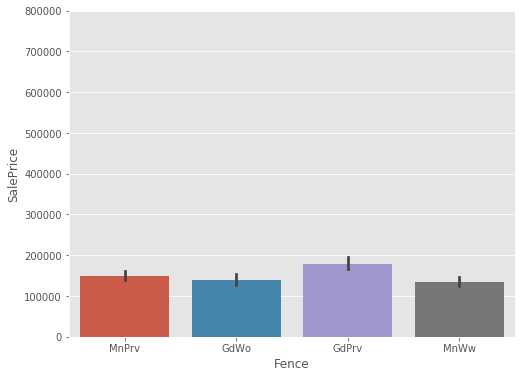

In [37]:
#relationship with categorical variables#box plot Fence/saleprice
feat = 'Fence'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

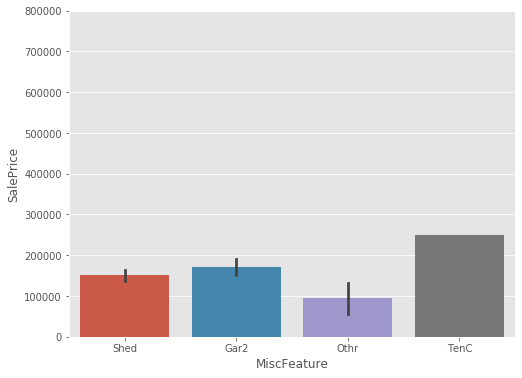

In [38]:
#relationship with categorical variables#box plot MiscFeature/saleprice
feat = 'MiscFeature'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

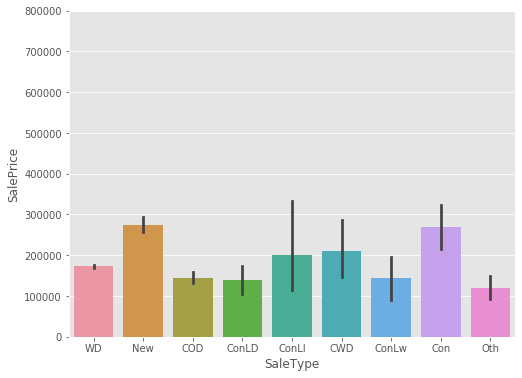

In [39]:
#relationship with categorical variables#box plot SaleType/saleprice
feat = 'SaleType'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

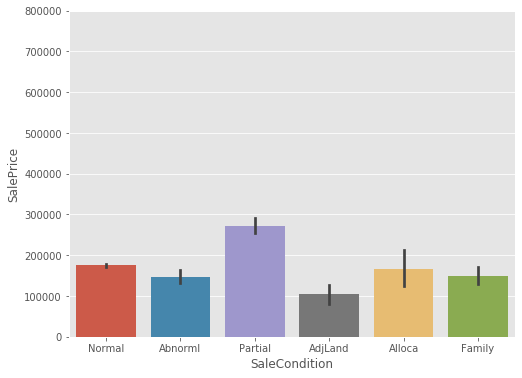

In [40]:
#relationship with categorical variables#box plot SaleCondition/saleprice
feat = 'SaleCondition'
data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=feat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

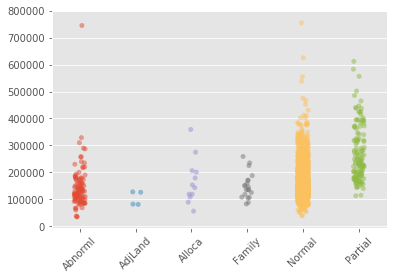

In [41]:
# feat = 'SaleCondition'
# data = pd.concat([dfn['SalePrice'], dfn[feat]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.barplot(x=feat, y="SalePrice", data=data)
# fig.axis(ymin=0, ymax=800000);

sns.stripplot(x = dfn['SaleCondition'].values, y = dfn['SalePrice'].values,
              order = np.sort(dfn.SaleCondition.unique()),
              jitter=0.1, alpha=0.5)

plt.xticks(rotation=45)

In [42]:
# #saleprice correlation matrix
# k = 10 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# cm = np.corrcoef(df_train[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

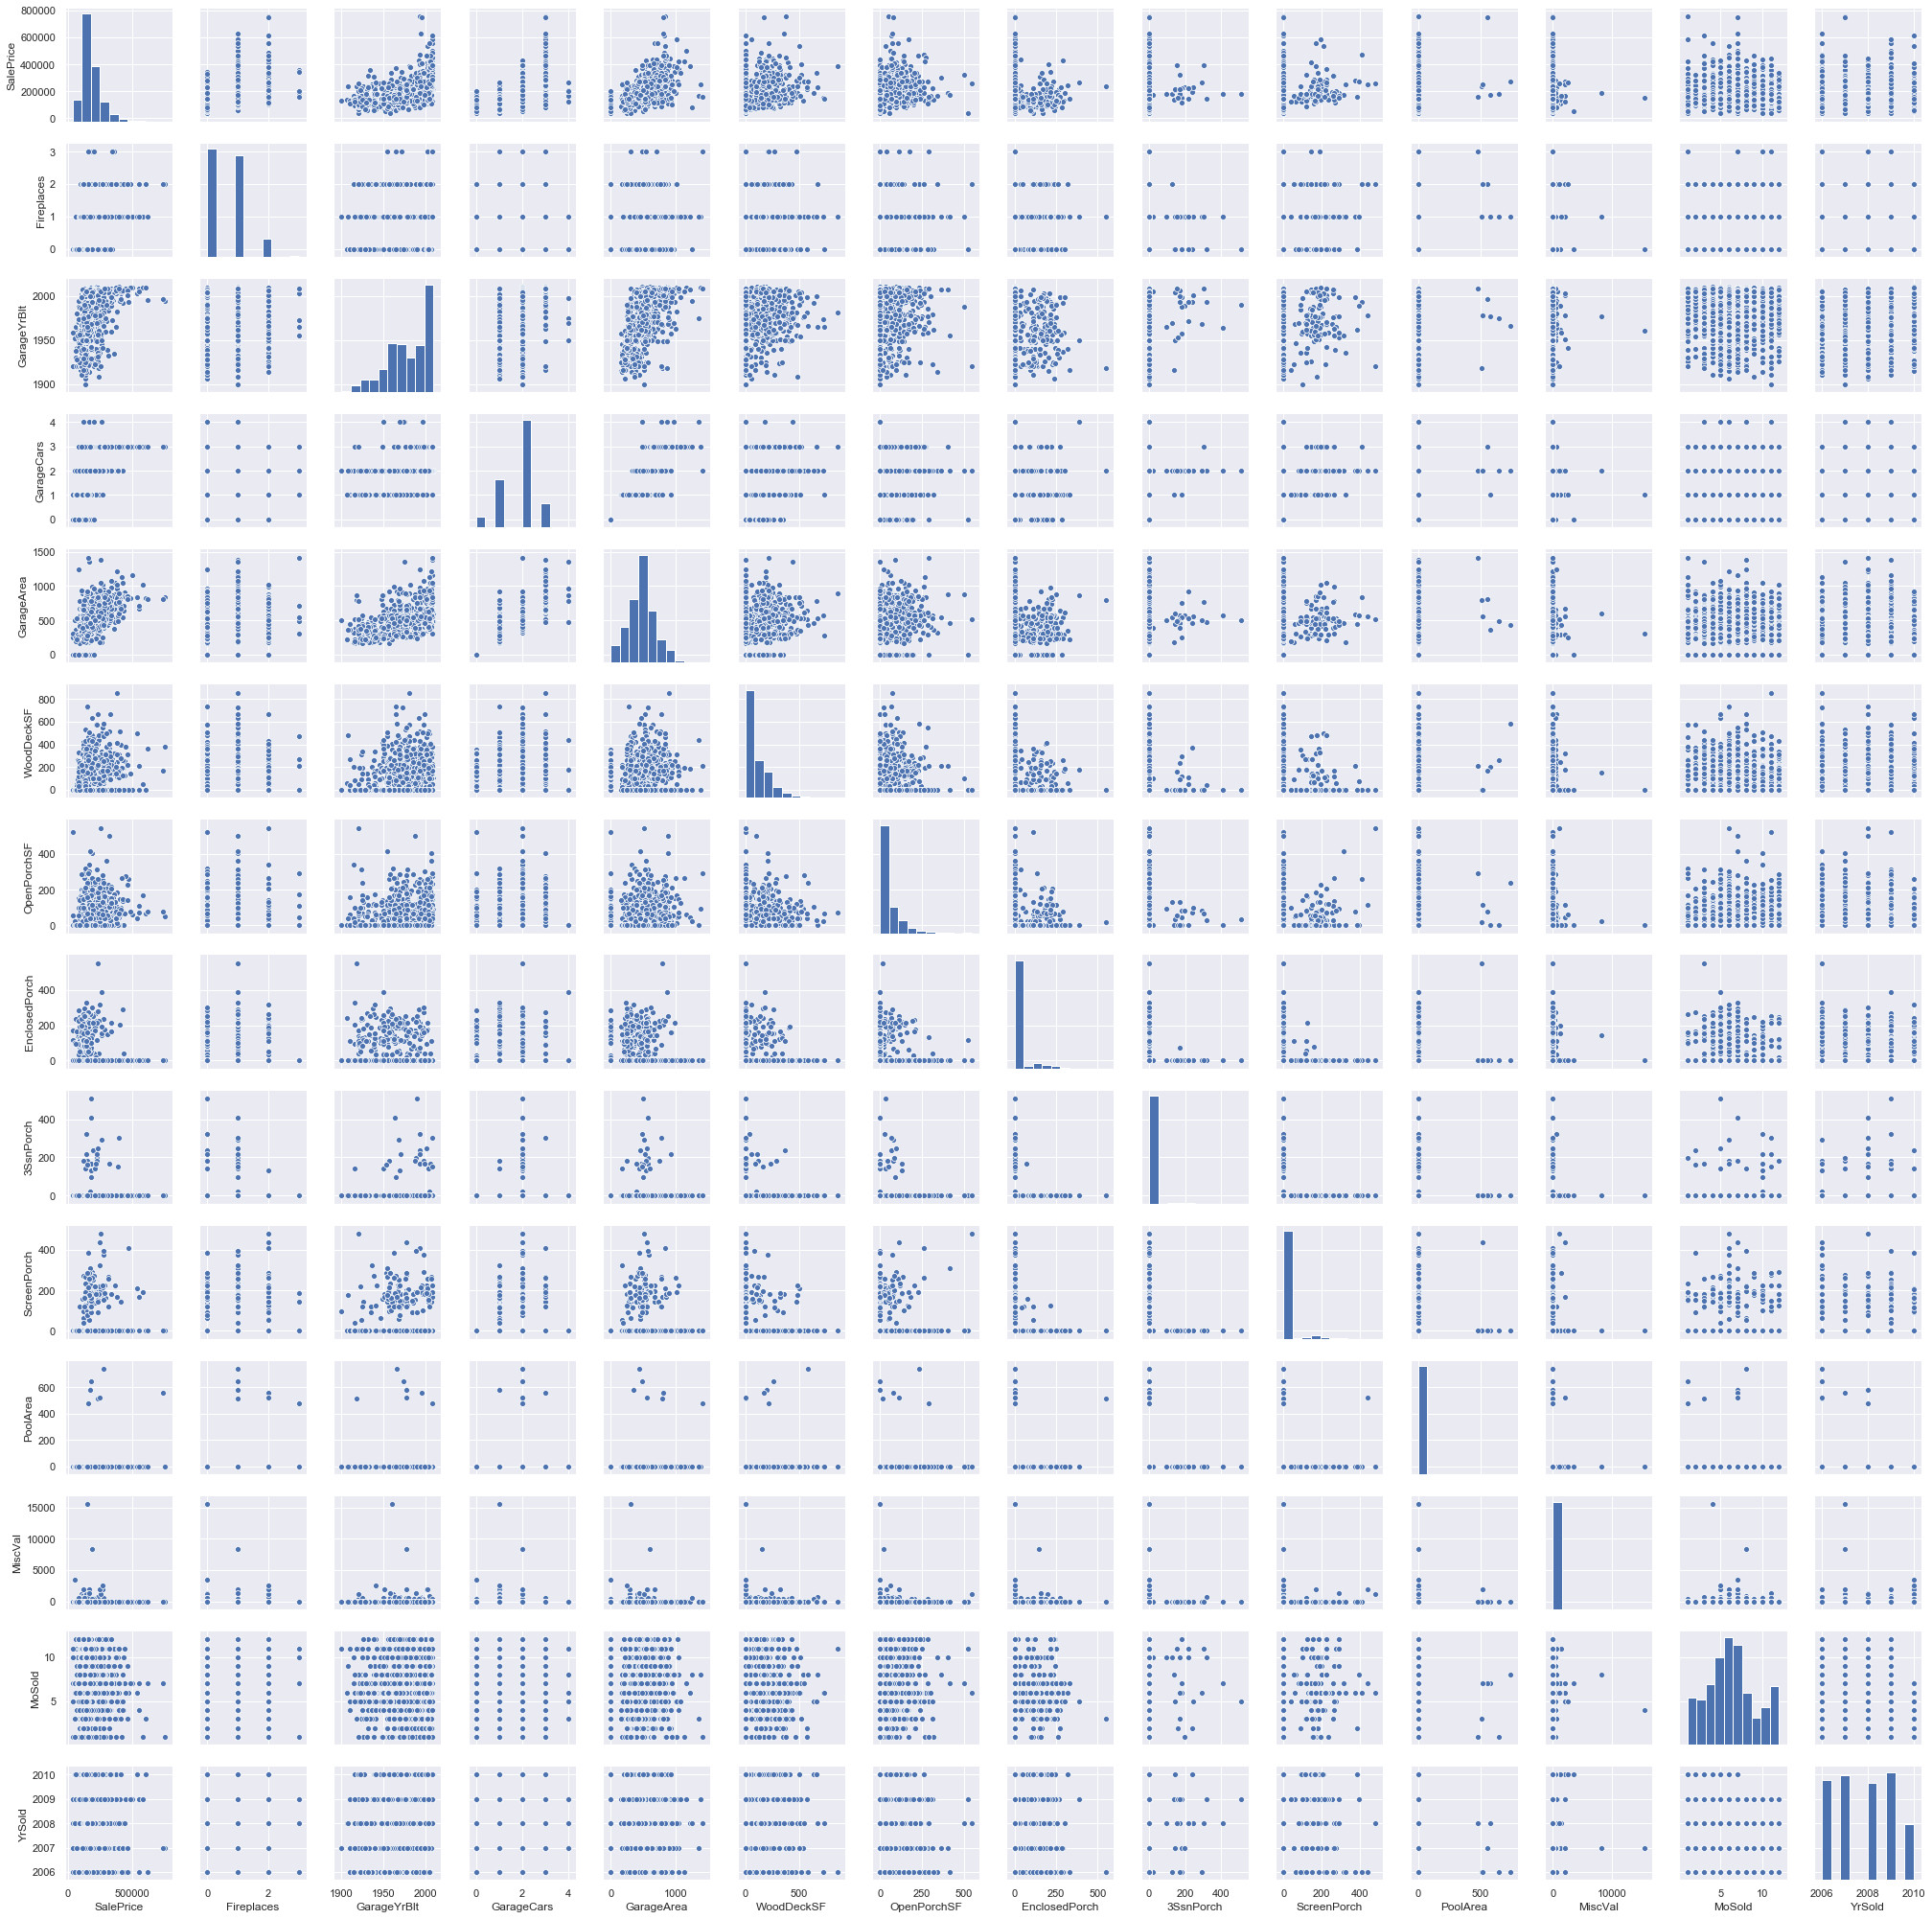

In [43]:
#scatterplot
sns.set()
cols = ['SalePrice', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']
sns.pairplot(dfn2[cols], size = 2)

plt.show();


In [44]:
print(dfn2.columns)

Index(['Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [46]:
# Categorical variables
# For categorical variables, bar charts and frequency counts are the natural counterparts to histograms. As an example, let’s have a look at the distribution of Foundation in our training set:

# data_train.Foundation.value_counts()
# sns.countplot(data_train.Foundation)

In [47]:
print(dfn3.columns)

Index(['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [48]:
categorical =['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']
for feature in categorical:
    print((dfn[feature].value_counts()/1460)*100)
    print('')

#         dfn[feature].groupby().mean()/overall mean

Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64

TA    89.794521
Fa     3.287671
Gd     0.958904
Po     0.205479
Ex     0.205479
Name: GarageQual, dtype: float64

TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64

Gd    0.205479
Ex    0.136986
Fa    0.136986
Name: PoolQC, dtype: float64

MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64

Shed    3.356164
Othr    0.136986
Gar2    0.136986
TenC    0.068493
Name: MiscFeature, dtype: float64

WD       86.780822
New       8.356164
COD       

In [49]:
missing_val_count_by_column = (dfn3.isnull().sum())
print((missing_val_count_by_column[missing_val_count_by_column > 0]/1460)*100)

FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [52]:
dfn[['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']]


,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [53]:
sc_pivot = dfn.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sc_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


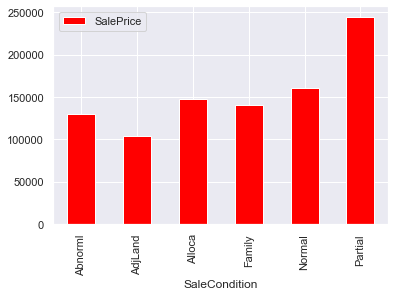

In [54]:
sc_pivot.plot(kind='bar',color='red')

In [55]:
st_pivot = dfn.pivot_table(index='SaleType', values='SalePrice', aggfunc=np.median)
st_pivot

,SalePrice
SaleType,
COD,139000
CWD,188750
Con,269600
ConLD,140000
ConLI,125000
ConLw,144000
New,247453
Oth,116050
WD,158000


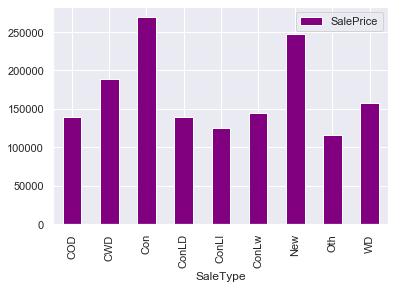

In [56]:
st_pivot.plot(kind='bar',color='purple')

In [ ]:
# sns.set()
# categorical =['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
#        'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
#        'SaleCondition']
# sns.countplot(dfn3[categorical])
# plt.show();

In [58]:
columns = np.full((dfn2.corr().shape[0],), True, dtype=bool)
for i in range(dfn2.corr().shape[0]):
    for j in range(i+1, dfn2.corr().shape[0]):
        if dfn2.corr().iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False
selected_columns = dfn2.columns[columns]
df4 = dfn2[selected_columns]
df4

,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,2003.0,0,61,0,0,0,0,0,2,2008
1,1,1976.0,298,0,0,0,0,0,0,5,2007
2,1,2001.0,0,42,0,0,0,0,0,9,2008
3,1,1998.0,0,35,272,0,0,0,0,2,2006
4,1,2000.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1999.0,0,40,0,0,0,0,0,8,2007
1456,2,1978.0,349,0,0,0,0,0,0,2,2010
1457,2,1941.0,0,60,0,0,0,0,2500,5,2010
1458,0,1950.0,366,0,112,0,0,0,0,4,2010


In [59]:
df4.columns

Index(['Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [60]:
df4.dtypes

Fireplaces         int64
GarageYrBlt      float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [61]:
dfn.columns

Index(['Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

selected_columns = selected_columns[1:].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(df4.iloc[:,1:].values, df4.iloc[:,0].values, SL, selected_columns)

# Missingness


In [62]:
# Generate the boolean flags indicating missing rows and columns
missingRows = pd.isnull(df).sum(axis=1) > 0
missingCols = pd.isnull(df).sum(axis=0) > 0
print('The columns with missingness are %s' %(df.columns[missingCols]))
df_train = df[~missingRows]

The columns with missingness are Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


numerical missingness:   ,'GarageYrBlt'

categorical missingness:  ,'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature'

In [63]:
#Generate the boolean flags indicating missing rows and columns
missingRows = pd.isnull(dfn).sum(axis=1) > 0
missingCols = pd.isnull(dfn).sum(axis=0) > 0
print('The columns with missingness are %s' %(dfn.columns[missingCols]))
dfm = dfn[~missingRows]

The columns with missingness are Index(['FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


In [64]:
dfn2.dtypes

Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

numerical missingness:'GarageYrBlt'

In [65]:
#Generate the boolean flags indicating missing rows and columns
missingRows = pd.isnull(dfn2).sum(axis=1) > 0
missingCols = pd.isnull(dfn2).sum(axis=0) > 0
print('The columns with missingness are %s' %(dfn2.columns[missingCols]))
dfmn = dfn2[~missingRows]

The columns with missingness are Index(['GarageYrBlt'], dtype='object')


categorical missingness:['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature']

In [67]:
#Generate the boolean flags indicating missing rows and columns
missingRows = pd.isnull(dfn3).sum(axis=1) > 0
missingCols = pd.isnull(dfn3).sum(axis=0) > 0
print('The columns with missingness are %s' %(dfn3.columns[missingCols]))
dfmn = dfn3[~missingRows]

The columns with missingness are Index(['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


In [68]:
# dfn['FireplaceQu'].value_counts()
dfn[['SalePrice','FireplaceQu']].groupby('FireplaceQu').mean()

,SalePrice
FireplaceQu,
Ex,337712.500000
Fa,167298.484848
Gd,226351.415789
Po,129764.150000
TA,205723.488818


In [69]:
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
# def correlation_ratio(categories, measurements):
#     fcat, _ = pd.factorize(categories)
#     cat_num = np.max(fcat)+1
#     y_avg_array = np.zeros(cat_num)
#     n_array = np.zeros(cat_num)
#     for i in range(0,cat_num):
#         cat_measures = measurements[np.argwhere(fcat == i).flatten()]
#         n_array[i] = len(cat_measures)
#         y_avg_array[i] = np.average(cat_measures)
#     y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
#     numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
#     denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
#     if numerator == 0:
#         eta = 0.0
#     else:
#         eta = np.sqrt(numerator/denominator)
#     return eta

In [ ]:
# correlation_ratio(dfn3, dfn3)

In [ ]:
#cramers_v(dfn3, dfn3)

In [ ]:
# dummy         = pd.get_dummies(x_y.Condition1, prefix=‘C1’)
# dummy.drop(‘C1_Norm’, axis=1, inplace=True) # C1_Norm is the dominant category
# x_y2 = x_y.drop(‘Condition1’, axis=1)
# x_y2 = pd.concat([x_y, dummy], axis=1)
# x_y2.head()

In [70]:
#check missing values
df.columns[df.isnull().any()]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [71]:
#missing value counts in each of these columns
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

AttributeError: module 'seaborn' has no attribute 'plt'

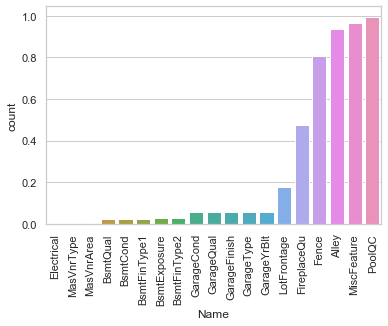

In [72]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
sns.plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\nilli\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

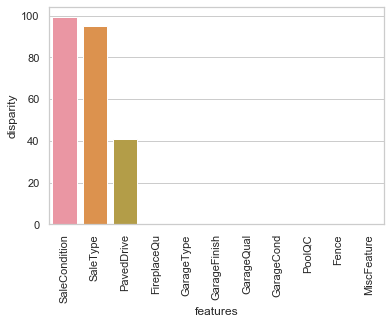

In [73]:
# ANOVA test
# Ho - There exists no significant difference between the groups. 
# Ha - There exists a significant difference between the groups.

cat = [f for f in dfn.columns if dfn.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

dfn3['SalePrice'] = df['SalePrice'].values
k = anova(dfn3) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

In [516]:
# df['GarageCars'].astype('object').value_counts()
# df['GarageCars']

In [75]:
k
# From the p-values calculate a disparity score. 
# A higher disparity score indicates that the feature has a higher predicting sale price value.

,features,pval,disparity
10,SaleCondition,7.988268e-44,99.235770
9,SaleType,5.039767e-42,95.091214
5,PavedDrive,1.803569e-18,40.856764
0,FireplaceQu,NaN,NaN
1,GarageType,NaN,NaN
2,GarageFinish,NaN,NaN
3,GarageQual,NaN,NaN
4,GarageCond,NaN,NaN
6,PoolQC,NaN,NaN
7,Fence,NaN,NaN


#imputing using mode
test.loc[666, 'GarageQual'] = "TA" #stats.mode(test['GarageQual']).mode
test.loc[666, 'GarageCond'] = "TA" #stats.mode(test['GarageCond']).mode
test.loc[666, 'GarageFinish'] = "Unf" #stats.mode(test['GarageFinish']).mode
test.loc[666, 'GarageYrBlt'] = "1980" #np.nanmedian(test['GarageYrBlt'])` 

dfn.loc[1116, 'GarageType'] 

#mark as missing
test.loc[1116, 'GarageType'] = np.nan

#imputing missing values
# alldata["MasVnrArea"].fillna(0, inplace=True)
# alldata["BsmtFinSF1"].fillna(0, inplace=True)
# alldata["BsmtFinSF2"].fillna(0, inplace=True)
# alldata["BsmtUnfSF"].fillna(0, inplace=True)
# alldata["TotalBsmtSF"].fillna(0, inplace=True)
dfn["GarageArea"].fillna(0, inplace=True)
# alldata["BsmtFullBath"].fillna(0, inplace=True)
# alldata["BsmtHalfBath"].fillna(0, inplace=True)
dfn["GarageCars"].fillna(0, inplace=True)
dfn["GarageYrBlt"].fillna(0.0, inplace=True)
dfn["PoolArea"].fillna(0, inplace=True)

In [77]:
x_Train =df[['Neighborhood','OverallQual','YearBuilt', 'YearRemodAdd', 'RoofStyle','Exterior1st', 'Exterior2nd','ExterQual','Foundation','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC', 'GrLivArea', 'KitchenQual','Fireplaces','GarageArea']]
x_Train

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,KitchenQual,Fireplaces,GarageArea
0,CollgCr,7,2003,2003,Gable,VinylSd,VinylSd,Gd,PConc,706,0,150,856,Ex,1710,Gd,0,548
1,Veenker,6,1976,1976,Gable,MetalSd,MetalSd,TA,CBlock,978,0,284,1262,Ex,1262,TA,1,460
2,CollgCr,7,2001,2002,Gable,VinylSd,VinylSd,Gd,PConc,486,0,434,920,Ex,1786,Gd,1,608
3,Crawfor,7,1915,1970,Gable,Wd Sdng,Wd Shng,TA,BrkTil,216,0,540,756,Gd,1717,Gd,1,642
4,NoRidge,8,2000,2000,Gable,VinylSd,VinylSd,Gd,PConc,655,0,490,1145,Ex,2198,Gd,1,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,6,1999,2000,Gable,VinylSd,VinylSd,TA,PConc,0,0,953,953,Ex,1647,TA,1,460
1456,NWAmes,6,1978,1988,Gable,Plywood,Plywood,TA,CBlock,790,163,589,1542,TA,2073,TA,2,500
1457,Crawfor,7,1941,2006,Gable,CemntBd,CmentBd,Ex,Stone,275,0,877,1152,Ex,2340,Gd,2,252
1458,NAmes,5,1950,1996,Hip,MetalSd,MetalSd,TA,CBlock,49,1029,0,1078,Gd,1078,Gd,0,240


In [78]:
#missing value counts in each of these columns
miss = x_Train.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

In [81]:
# x_Train['log_sales'] = np.log(X_Train['SalePrice'])

# x_Train.head()

In [82]:

trainFeatures = df[['Neighborhood','OverallQual','YearBuilt', 'YearRemodAdd', 'RoofStyle','Exterior1st', 'Exterior2nd','ExterQual','Foundation','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC', 'GrLivArea', 'KitchenQual','Fireplaces','GarageArea']].copy()
log_sales = np.log(df['SalePrice'])


In [83]:
X =trainFeatures
Y= log_sales

In [84]:
X.head()

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,KitchenQual,Fireplaces,GarageArea
0,CollgCr,7,2003,2003,Gable,VinylSd,VinylSd,Gd,PConc,706,0,150,856,Ex,1710,Gd,0,548
1,Veenker,6,1976,1976,Gable,MetalSd,MetalSd,TA,CBlock,978,0,284,1262,Ex,1262,TA,1,460
2,CollgCr,7,2001,2002,Gable,VinylSd,VinylSd,Gd,PConc,486,0,434,920,Ex,1786,Gd,1,608
3,Crawfor,7,1915,1970,Gable,Wd Sdng,Wd Shng,TA,BrkTil,216,0,540,756,Gd,1717,Gd,1,642
4,NoRidge,8,2000,2000,Gable,VinylSd,VinylSd,Gd,PConc,655,0,490,1145,Ex,2198,Gd,1,836


In [85]:
Y = pd.Series( log_sales)
Y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [86]:
from sklearn.preprocessing import OneHotEncoder
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( X[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
X = pd.concat( (X.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )
X.head()

,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtFinSF2,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,7,2003,2003,Gable,VinylSd,VinylSd,Gd,PConc,706,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,1976,1976,Gable,MetalSd,MetalSd,TA,CBlock,978,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7,2001,2002,Gable,VinylSd,VinylSd,Gd,PConc,486,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,1915,1970,Gable,Wd Sdng,Wd Shng,TA,BrkTil,216,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2000,2000,Gable,VinylSd,VinylSd,Gd,PConc,655,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# dummify RoofStyle column
RoofStyle_ohe = OneHotEncoder( drop='first', sparse = False )
RoofStyle_enc = RoofStyle_ohe.fit_transform( X[['RoofStyle']] )
RoofStyle_enc = pd.DataFrame( RoofStyle_enc, columns=RoofStyle_ohe.get_feature_names(['RoofStyle']) )
X = pd.concat( (X.drop(["RoofStyle"], axis=1).reset_index(drop = True), RoofStyle_enc), axis = 1 )
X.head()

,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,7,2003,2003,VinylSd,VinylSd,Gd,PConc,706,0,150,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,6,1976,1976,MetalSd,MetalSd,TA,CBlock,978,0,284,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,7,2001,2002,VinylSd,VinylSd,Gd,PConc,486,0,434,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,7,1915,1970,Wd Sdng,Wd Shng,TA,BrkTil,216,0,540,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,8,2000,2000,VinylSd,VinylSd,Gd,PConc,655,0,490,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [88]:
#dummify Exterior1st Column
Exterior1st_ohe = OneHotEncoder( drop='first', sparse = False )
Exterior1st_enc = Exterior1st_ohe.fit_transform(X[['Exterior1st']] )
Exterior1st_enc = pd.DataFrame( Exterior1st_enc, columns=Exterior1st_ohe.get_feature_names(['Exterior1st']) )
X = pd.concat( (X.drop(["Exterior1st"], axis=1).reset_index(drop = True), Exterior1st_enc), axis = 1 )
X.head()

,OverallQual,YearBuilt,YearRemodAdd,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,7,2003,2003,VinylSd,Gd,PConc,706,0,150,856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6,1976,1976,MetalSd,TA,CBlock,978,0,284,1262,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,2001,2002,VinylSd,Gd,PConc,486,0,434,920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7,1915,1970,Wd Shng,TA,BrkTil,216,0,540,756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,8,2000,2000,VinylSd,Gd,PConc,655,0,490,1145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [89]:
#dummify Exterior2nd Column
Exterior2nd_ohe = OneHotEncoder( drop='first', sparse = False )
Exterior2nd_enc = Exterior2nd_ohe.fit_transform( X[['Exterior2nd']] )
Exterior2nd_enc = pd.DataFrame( Exterior2nd_enc, columns=Exterior2nd_ohe.get_feature_names(['Exterior2nd']) )
X = pd.concat( (X.drop(["Exterior2nd"], axis=1).reset_index(drop = True), Exterior2nd_enc), axis = 1 )
X.head()
#dummify Foundation Column
Foundation_ohe = OneHotEncoder( drop='first', sparse = False )
Foundation_enc = Foundation_ohe.fit_transform( X[['Foundation']] )
Foundation_enc = pd.DataFrame( Foundation_enc, columns=Foundation_ohe.get_feature_names(['Foundation']) )
X = pd.concat( (X.drop(["Foundation"], axis=1).reset_index(drop = True), Foundation_enc), axis = 1 )
X.head()
#dummify Heating QC Column
HeatingQC_ohe = OneHotEncoder( drop='first', sparse = False )
HeatingQC_enc = HeatingQC_ohe.fit_transform( X[['HeatingQC']] )
HeatingQC_enc = pd.DataFrame( HeatingQC_enc, columns=HeatingQC_ohe.get_feature_names(['HeatingQC']) )
X = pd.concat( (X.drop(["HeatingQC"], axis=1).reset_index(drop = True), HeatingQC_enc), axis = 1 )
X.head()
# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( X[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
X = pd.concat( (X.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )
X.head()

# dummify Fireplaces column
Fireplaces_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
Fireplaces_enc = Fireplaces_ohe.fit_transform(X[['Fireplaces']] )
Fireplaces_enc = pd.DataFrame( Fireplaces_enc, columns=Fireplaces_ohe.get_feature_names(['Fireplaces']) )
X = pd.concat( (X.drop(["Fireplaces"], axis=1).reset_index(drop = True), Fireplaces_enc), axis = 1 )
X.head()

# dummify OverallQual column
# OverallQual_ohe = OneHotEncoder( drop='first', sparse = False,categories="auto"  )
# OverallQual_enc = OverallQual_ohe.fit_transform(X[['OverallQual']] )
# OverallQual_enc = pd.DataFrame( OverallQual_enc, columns=OverallQual_ohe.get_feature_names(['OverallQual']) )
# X = pd.concat( (X.drop(["OverallQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )
# X.head()

# dummify ExterQual column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform(X[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
X = pd.concat( (X.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )
X.head()






,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,Neighborhood_Blueste,...,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,7,2003,2003,706,0,150,856,1710,548,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6,1976,1976,978,0,284,1262,1262,460,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,7,2001,2002,486,0,434,920,1786,608,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,7,1915,1970,216,0,540,756,1717,642,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,8,2000,2000,655,0,490,1145,2198,836,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [92]:
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()

# Xtrain = pd.DataFrame( ss.fit_transform( X), columns = X.columns )

# X.head()

In [116]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X,Y, test_size = 0.2  )
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xtrain = pd.DataFrame( ss.fit_transform( Xtrain ), columns = Xtrain.columns )
Xtrain.head()



,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,Neighborhood_Blueste,...,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,2.131506,1.188032,1.078914,-0.901062,-0.291823,2.757198,1.865729,0.601886,1.434743,-0.041416,...,-0.643462,-0.167836,1.236179,-1.020763,1.112451,-0.292407,-0.050746,-0.101885,-0.705291,-1.288640
1,-0.794852,-0.292501,-1.097548,-1.011427,-0.291823,0.745229,-0.387262,-1.216718,-0.791166,-0.041416,...,-0.643462,-0.167836,-0.808944,0.979659,-0.898916,-0.292407,-0.050746,-0.101885,-0.705291,0.776012
2,-0.794852,-1.641431,1.030548,0.627953,-0.291823,-0.926076,-0.430962,-1.080420,-0.198864,-0.041416,...,-0.643462,-0.167836,-0.808944,0.979659,-0.898916,-0.292407,-0.050746,-0.101885,-0.705291,0.776012
3,1.399917,1.023528,0.837085,1.789085,-0.291823,-0.498533,1.249070,0.331238,1.831204,-0.041416,...,-0.643462,-0.167836,1.236179,-1.020763,-0.898916,3.419891,-0.050746,-0.101885,1.417854,-1.288640
4,0.668327,0.990627,0.837085,-1.011427,-0.291823,2.224484,1.183519,0.043065,1.764331,-0.041416,...,-0.643462,-0.167836,1.236179,-1.020763,1.112451,-0.292407,-0.050746,-0.101885,1.417854,-1.288640


In [117]:
X.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd'

(array([  1.,   0.,   0.,   3.,   5.,  17., 165., 770., 195.,  12.]),
 array([-1.4227109 , -1.23301316, -1.04331542, -0.85361768, -0.66391993,
        -0.47422219, -0.28452445, -0.09482671,  0.09487103,  0.28456878,
         0.47426652]),
 <a list of 10 Patch objects>)

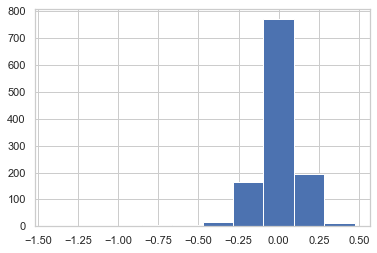

In [150]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(Xtrain, Ytrain)
residuals = Ytrain - lm.predict(Xtrain)
plt.hist(residuals)

In [151]:
print('R^2 is equal to %.3f' %(lm.score(Xtrain, Ytrain)))
print('RSS is equal to %.3f' %(np.sum((Ytrain-lm.predict(Xtrain))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.897
RSS is equal to 19.506
The intercept is 12.023
The slopes are [ 9.15384335e-02  1.98849894e-02  3.71887259e-02  2.65193769e+11
  9.52207878e+10  2.66695016e+11 -2.51155108e+11  1.21876686e-01
  4.46648797e-02 -3.45230103e-03 -1.90391541e-02  6.72912598e-03
  1.78146362e-02  1.28784180e-02  2.87475586e-02 -1.58929825e-02
  1.44147873e-02 -2.95562744e-02 -2.02178955e-02 -3.31115723e-03
 -1.32751465e-03 -3.83758545e-03  7.03430176e-03  1.88369751e-02
  2.53295898e-02 -2.58026123e-02 -4.34303284e-03 -3.99780273e-03
 -4.80651855e-04  1.86004639e-02  1.56936646e-02  1.19361877e-02
  8.54492188e-03 -2.23503113e-02 -8.19015503e-03 -1.41067505e-02
 -6.29425049e-04 -2.14004517e-03  1.73347064e+11 -1.55181885e-02
  3.75213623e-02  1.90006813e+11  5.06591797e-03  5.06286621e-02
  1.61743164e-03  5.94406128e-02  3.51409912e-02  1.30271912e-03
  1.56173706e-02  4.48799133e-02  2.03247070e-02  1.71623230e-02
 -1.73347064e+11 -2.15148926e-03 -1.46484375e-02 -1.90006813e+11
  6.64

In [152]:
print('R^2 is equal to %.3f' %(lm.score(Xtest, Ytest)))
print('RSS is equal to %.3f' %(np.sum((Ytest-lm.predict(Xtest))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to -6655199498527753795708911616.000
RSS is equal to 294218076324436046058723737600.000
The intercept is 12.023
The slopes are [ 9.15384335e-02  1.98849894e-02  3.71887259e-02  2.65193769e+11
  9.52207878e+10  2.66695016e+11 -2.51155108e+11  1.21876686e-01
  4.46648797e-02 -3.45230103e-03 -1.90391541e-02  6.72912598e-03
  1.78146362e-02  1.28784180e-02  2.87475586e-02 -1.58929825e-02
  1.44147873e-02 -2.95562744e-02 -2.02178955e-02 -3.31115723e-03
 -1.32751465e-03 -3.83758545e-03  7.03430176e-03  1.88369751e-02
  2.53295898e-02 -2.58026123e-02 -4.34303284e-03 -3.99780273e-03
 -4.80651855e-04  1.86004639e-02  1.56936646e-02  1.19361877e-02
  8.54492188e-03 -2.23503113e-02 -8.19015503e-03 -1.41067505e-02
 -6.29425049e-04 -2.14004517e-03  1.73347064e+11 -1.55181885e-02
  3.75213623e-02  1.90006813e+11  5.06591797e-03  5.06286621e-02
  1.61743164e-03  5.94406128e-02  3.51409912e-02  1.30271912e-03
  1.56173706e-02  4.48799133e-02  2.03247070e-02  1.71623230e-02
 -1.73347064e+1

In [120]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [121]:
lasso = Lasso()

params = {'alpha':(0.0001, 1000000), 'fit_intercept':[True,False]}
grid_search_lasso = GridSearchCV( estimator=lasso, param_grid=params )
grid_search_lasso.fit(Xtrain,Ytrain)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': (0.0001, 1000000),
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [122]:
grid_search_lasso.best_params_

{'alpha': 0.0001, 'fit_intercept': True}

In [123]:
grid_search_lasso.best_score_

0.8749262049329637

In [124]:
lasso = Lasso(alpha=.0001)
lasso.fit(Xtrain,Ytrain).coef_

array([ 9.20835587e-02,  1.81703417e-02,  3.77511095e-02,  3.94167045e-02,
        1.21757799e-02, -0.00000000e+00,  3.40095951e-02,  1.20646578e-01,
        4.48762323e-02, -3.99093856e-03, -1.91381187e-02,  4.20620895e-03,
        1.65509210e-02,  1.08890969e-02,  2.66033784e-02, -1.72352569e-02,
        1.16205513e-02, -3.09238300e-02, -2.20812987e-02, -4.37608951e-03,
       -3.11824485e-03, -3.32315781e-03,  4.35983461e-03,  1.71507918e-02,
        2.32444297e-02, -2.84096349e-02, -4.52660991e-03, -5.41986329e-03,
       -1.86283063e-03,  1.61372576e-02,  1.47758321e-02,  1.06752394e-02,
        8.56497617e-03, -1.77550725e-02, -7.60543519e-03, -1.01330852e-02,
       -8.44138312e-06, -1.09322693e-03, -7.81873490e-04, -1.73309733e-02,
        2.50436231e-02,  4.40866332e-03, -0.00000000e+00,  2.80093750e-02,
       -2.27751453e-04,  2.89272773e-02,  1.83386712e-02, -8.69074978e-04,
        9.69803906e-03,  1.55766443e-02, -0.00000000e+00,  8.85838924e-03,
       -0.00000000e+00, -

In [167]:
lasso = Lasso(alpha=.0001)
lasso.fit(Xtest,Ytest).coef_

array([ 7.29672858e-02,  2.09807973e-03,  1.97201200e-03,  5.65000394e-06,
        3.54699615e-05, -1.31999595e-05, -3.48292476e-06,  2.27412921e-04,
        1.14426854e-04,  0.00000000e+00, -1.58161520e-01,  1.10630985e-02,
       -1.18742156e-02,  4.60194572e-02,  1.69512753e-01, -4.51027069e-03,
       -0.00000000e+00,  1.06832416e-02, -2.59550416e-01,  8.50437714e-02,
        9.32941768e-02, -7.61909231e-02,  2.59451630e-03,  9.83857660e-02,
        1.33516045e-01, -2.57732701e-03,  5.01509041e-02,  1.00922238e-01,
        8.10521261e-02,  3.23735006e-02,  1.70107584e-01,  7.49554500e-02,
        2.97275567e-01,  3.51655126e-01,  3.27784578e-01,  3.24509134e-01,
        2.63074753e-01,  0.00000000e+00,  0.00000000e+00,  3.38845937e-01,
        6.61820087e-02,  0.00000000e+00,  2.30462352e-02, -6.09747770e-02,
        0.00000000e+00, -1.02179158e-01,  3.99597172e-02,  0.00000000e+00,
       -1.67943887e-01, -3.42184072e-02, -1.38836303e-01, -1.07386729e-01,
        6.46133232e-02, -

In [494]:
# lasso.fit(Xtrain, Ytrain).coef_
# lst = []
# for i in (list(zip(lasso.fit(Xtrain, Ytrain).coef_, Xtrain.columns))):
#     lst.append(i)
# lst

In [168]:
lasso.fit(Xtest, Ytest).coef_
lst = []
for i in (list(zip(lasso.fit(Xtest, Ytest).coef_, Xtest.columns))):
    lst.append(i)
lst

[(0.07296728579483848, 'OverallQual'),
 (0.0020980797336843104, 'YearBuilt'),
 (0.0019720119988993, 'YearRemodAdd'),
 (5.650003937658216e-06, 'BsmtFinSF1'),
 (3.546996145001022e-05, 'BsmtFinSF2'),
 (-1.3199959546039974e-05, 'BsmtUnfSF'),
 (-3.4829247580213405e-06, 'TotalBsmtSF'),
 (0.0002274129209335049, 'GrLivArea'),
 (0.00011442685390819463, 'GarageArea'),
 (0.0, 'Neighborhood_Blueste'),
 (-0.1581615202537757, 'Neighborhood_BrDale'),
 (0.01106309848585039, 'Neighborhood_BrkSide'),
 (-0.011874215588375312, 'Neighborhood_ClearCr'),
 (0.04601945724456743, 'Neighborhood_CollgCr'),
 (0.16951275295528664, 'Neighborhood_Crawfor'),
 (-0.0045102706891023015, 'Neighborhood_Edwards'),
 (-0.0, 'Neighborhood_Gilbert'),
 (0.010683241562239754, 'Neighborhood_IDOTRR'),
 (-0.2595504159436741, 'Neighborhood_MeadowV'),
 (0.08504377142719058, 'Neighborhood_Mitchel'),
 (0.09329417681411639, 'Neighborhood_NAmes'),
 (-0.07619092311876027, 'Neighborhood_NPkVill'),
 (0.002594516304777572, 'Neighborhood_NWAme

In [155]:
# import statsmodels.api as sm
# x = sm.add_constant(X)
# # Notice that the dependent variable (y) comes before the independent variables (x)
# # Use df.columns.values to get all the column names
# model = sm.OLS(Ytrain, Xtrain)
# results = model.fit()
# print(results.summary())

In [477]:
# from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
# ridge = Ridge()
# lasso = Lasso()
# net   = ElasticNet()
# alphaSize  = 40
# rhoSize    = 30
# alphaRange = np.linspace(1e-4, 10, alphaSize)
# rhoRange   = np.linspace(0.0001, 1, rhoSize)
# trainR2    = np.zeros((alphaSize, rhoSize))
# testR2     = np.zeros((alphaSize, rhoSize))
# intercepts = np.zeros((alphaSize, rhoSize))
# coefs      = np.zeros((alphaSize, rhoSize, 8))

# net.set_params(normalize=True)

# for alphaIdx, alpha in enumerate(alphaRange):
#     for rhoIdx, rho in enumerate(rhoRange):
#         net.set_params(alpha=alpha, l1_ratio=rho)
#         net.fit(Xb1train, Yb1train)
#         trainR2[alphaIdx, rhoIdx] = net.score(Xb1train, Yb1train)
#         testR2[alphaIdx, rhoIdx]  = net.score(Xb1test, Yb1test)
#         intercepts[alphaIdx, rhoIdx] = net.intercept_
# #         coefs[alphaIdx, rhoIdx, :] = net.coef_

In [478]:
trainR2[alphaIdx, rhoIdx] 


0.0

In [479]:
testR2[alphaIdx, rhoIdx] 


-7.992313858662392e-05

In [480]:
intercepts[alphaIdx, rhoIdx]

12.023355189946757

In [ ]:
dt = pd.read_csv ("C:\\Users\\nilli\\Downloads\\test.csv")
print(dt.head(2))

Project workflow
separate numerical features from categorical and select features based oncorrelation and heatmap 
Perform anova test on categorical values
preprocessing

In [ ]:
#import sklearn.preprocessing.RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
transformer
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True, with_scaling=True)
    transformer.transform(X)

In [134]:
X.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd'

In [412]:
trainFeaturesbare = df[['Neighborhood','OverallQual','YearBuilt', 'YearRemodAdd','YrSold', 'RoofStyle','Exterior1st', 'Exterior2nd','ExterQual','BsmtFinSF1','BsmtFinSF2', 'GrLivArea', 'KitchenQual']].copy()
log_sales = np.log(df['SalePrice'])

In [413]:
trainFeaturesbare

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,YrSold,RoofStyle,Exterior1st,Exterior2nd,ExterQual,BsmtFinSF1,BsmtFinSF2,GrLivArea,KitchenQual
0,CollgCr,7,2003,2003,2008,Gable,VinylSd,VinylSd,Gd,706,0,1710,Gd
1,Veenker,6,1976,1976,2007,Gable,MetalSd,MetalSd,TA,978,0,1262,TA
2,CollgCr,7,2001,2002,2008,Gable,VinylSd,VinylSd,Gd,486,0,1786,Gd
3,Crawfor,7,1915,1970,2006,Gable,Wd Sdng,Wd Shng,TA,216,0,1717,Gd
4,NoRidge,8,2000,2000,2008,Gable,VinylSd,VinylSd,Gd,655,0,2198,Gd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,6,1999,2000,2007,Gable,VinylSd,VinylSd,TA,0,0,1647,TA
1456,NWAmes,6,1978,1988,2010,Gable,Plywood,Plywood,TA,790,163,2073,TA
1457,Crawfor,7,1941,2006,2010,Gable,CemntBd,CmentBd,Ex,275,0,2340,Gd
1458,NAmes,5,1950,1996,2010,Hip,MetalSd,MetalSd,TA,49,1029,1078,Gd


In [414]:
trainFeaturesbare['HouseSF'] =trainFeaturesbare['BsmtFinSF1']+trainFeaturesbare['BsmtFinSF2']+trainFeaturesbare['GrLivArea']
trainFeaturesbare['HouseSF']

0       2416
1       2240
2       2272
3       1933
4       2853
        ... 
1455    1647
1456    3026
1457    2615
1458    2156
1459    2376
Name: HouseSF, Length: 1460, dtype: int64

In [393]:
# trainFeaturesbare['YrRenovation'] =trainFeaturesbare['YearRemodAdd'] - trainFeaturesbare['YearBuilt']
# trainFeaturesbare['YrRenovation'] 

In [355]:
# trainFeaturesbare[trainFeaturesbare.YearRemodAdd== trainFeaturesbare.YearBuilt]#.value_counts()

In [366]:
#trainFeaturesbare.drop(['BsmtFinSF1','BsmtFinSF2','YearBuilt','YearRemodAdd','GrLivArea'], axis=1)

In [415]:
#trainFeaturesbare['Exterior1st'].value_counts()

In [329]:
# def mat_replace(a):
#     if trainFeaturesbare[a].value_counts()<100:
#         return Other 
#     else trainFeaturesbare[a]
# def mat_replace(a):
#      return other if x == 'VynilSd' else 0
# # train['enc_condition'] = train.SaleCondition.apply(encode)    

# material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
# for mat in material:
#     for trainFeaturesbare['Exterior1st'][trainFeaturesbare['Exterior1st'].value_counts() < 100]:
#         trainFeaturesbare['Exterior1st']=trainFeaturesbare['Exterior1st'].str.replace(mat,'Other' )
# trainFeaturesbare['Exterior1st']        
    
# trainFeaturesbare['Exterior1st'].value_counts()
# def mat_replace(x):
#     if(trainFeaturesbare.Exterior1st == trainFeaturesbare.Exterior2nd):
#         return trainFeaturesbare.Exterior1st
#     else: 
#         return trainFeaturesbare.Exterior1st+trainFeaturesbare.Exterior1st

# trainFeaturesbare['Exterior1st2nd'] = trainFeaturesbare.apply(mat_replace,axis=1)

In [330]:

# trainFeaturesbare['Exterior2nd'].apply(mat_replace)
# # # def encode(x):
# #     return 1 if x == 'Partial' else 0
# # train['enc_condition'] = train.SaleCondition.apply(encode)
# # test['enc_condition'] = test.SaleCondition.apply(encode)

House Age: The difference between Year Sold and Year Remodeled
Remodeled: Binary value that takes 1 if the house has a remodeled year that is different from the year it was built in

In [365]:
# material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
# for mat in material:
#     trainFeaturesbare['Exterior1st']=trainFeaturesbare['Exterior1st'].str.replace(mat,'Other' )
    
# trainFeaturesbare['Exterior1st'].value_counts()    

In [361]:
#if area>0 it gets 1, for area==0 it gets 0
# trainFeaturesbare['Exterior1st2nd'] = pd.Series(len(trainFeaturesbare['Exterior1st']), index=trainFeaturesbare.index)
# trainFeaturesbare['Exterior1st2nd'] = 0 
# trainFeaturesbare.loc[trainFeaturesbare['Exterior1st']== 'VinylSd','Exterior1st2nd'] = 1

# trainFeaturesbare['Exterior1st2nd'] = pd.Series(len(trainFeaturesbare['Exterior1st']), index=trainFeaturesbare.index)
# trainFeaturesbare['Exterior1st2nd'] = trainFeaturesbare['Exterior1st']
# trainFeaturesbare.loc[trainFeaturesbare['Exterior1st']!=trainFeaturesbare['Exterior2nd'],'Exterior1st2nd'] = 'Other'

# trainFeaturesbare['Exterior1st2nd'].value_counts()

In [364]:
#trainFeaturesbare['Exterior1st2nd'].value_counts()

In [399]:
# trainFeaturesbare1 =trainFeaturesbare.drop(['BsmtFinSF1','BsmtFinSF2','YearBuilt','YearRemodAdd','YrRenovation','Exterior1st','Exterior2nd','GrLivArea','YearRemodAdd','Exterior1st2nd','Exteriorn2st1nd'], axis=1)
# trainFeaturesbare1

In [398]:
# trainFeaturesbare['Exterior2st1nd'].value_counts()
# trainFeaturesbare

In [459]:
trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('CmentBd','CemntBd' )
trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('Brk Cmn','BrkComm' )
#trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('BrkComm','Other' )
# trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('ImStucc','Other' )
# trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('AsphShn','Other' )
# trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('CBlock','Other' )
# trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('Stone','Other' )
# trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('Stucco','Other' )
# trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('WdShing','Other' )
# trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('CemntBd','Other' )
# trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('BrkFace','Other' )
# trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('Wd Shng','Other' )
# trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('AsbShng','Other' )
material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
for mat in material:
    trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace(mat,'Other' )
    


trainFeaturesbare['Exterior2nd'].value_counts()



VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Other      158
Plywood    142
Wd Shng     38
Name: Exterior2nd, dtype: int64

In [460]:
material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
for mat in material:
    trainFeaturesbare['Exterior1st']=trainFeaturesbare['Exterior1st'].str.replace(mat,'Other' )
    
trainFeaturesbare['Exterior1st'].value_counts()   

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Other      189
Plywood    108
Name: Exterior1st, dtype: int64

In [461]:
trainFeaturesbare['Exterior1st2nd'] = pd.Series(len(trainFeaturesbare['Exterior1st']), index=trainFeaturesbare.index)
trainFeaturesbare['Exterior1st2nd'] = trainFeaturesbare['Exterior1st']
trainFeaturesbare.loc[trainFeaturesbare['Exterior1st']!=trainFeaturesbare['Exterior2nd'],'Exterior1st2nd'] = 'Other'

#trainFeaturesbare['Exterior1st2nd'].value_counts()

In [462]:
trainFeaturesbare['Exterior1st2nd'].value_counts() 

VinylSd    502
Other      280
MetalSd    212
HdBoard    193
Wd Sdng    177
Plywood     96
Name: Exterior1st2nd, dtype: int64

In [336]:
# combination =['Other','HdBoard','Wd Sdng','VinylSd','Plywood','MetalSd','Stone']
# for comb in material:
# if trainFeaturesbare['Exterior1st']==trainFeaturesbare['Exterior2nd']:
#     trainFeaturesbare['Exterior1st']+trainFeaturesbare['Exterior2nd'] 
# #     else :    
#         trainFeaturesbare['Exterior1st'] = trainFeaturesbare['Exterior1st']
# trainFeaturesbare[trainFeaturesbare['Exterior1st']!=trainFeaturesbare['Exterior2nd']]

In [337]:
# trainFeaturesbare[trainFeaturesbare['Exterior1st']!=trainFeaturesbare['Exterior2nd']]['Exterior1st'].value_counts()

In [331]:
# #trainFeaturesbare[trainFeaturesbare['Exterior1st']!=trainFeaturesbare['Exterior2nd']]['Exterior2nd'].str.replace('Plywood','TwoMaterials')
# # trainFeaturesbare[trainFeaturesbare['Exterior1st']!=trainFeaturesbare['Exterior2nd']]['Exterior2nd'].str.replace('Wd Sdng','TwoMaterials')
# #trainFeaturesbare[trainFeaturesbare['Exterior1st']!=trainFeaturesbare['Exterior2nd']]
# #trainFeaturesbare[trainFeaturesbare['Exterior1st']!=trainFeaturesbare['Exterior2nd']]['Exterior2nd']
# trainFeaturesbare['Exterior1st'] = trainFeaturesbare['Exterior1st']+trainFeaturesbare['Exterior2nd'] 
# trainFeaturesbare['Exterior1st'].value_counts()

In [332]:
# pd.merge(trainFeaturesbare['Exterior1st'], trainFeaturesbare['Exterior2nd'])

In [333]:
# trainFeaturesbare[trainFeaturesbare['Exterior1st']!=trainFeaturesbare['Exterior2nd']]['Exterior2nd'].value_counts()

In [ ]:
# Wd Sdng Wd Shng WdShing

In [371]:
# trainFeaturesbare['ExterQual'].value_counts()

In [335]:
# trainFeaturesbare['Exterior2nd'].value_counts()

In [334]:
# trainFeaturesbare['Exterior1st'].value_counts()

In [389]:
# trainFeaturesbare['Exterior1st2nd'] = pd.Series(len(trainFeaturesbare['Exterior1st']), index=trainFeaturesbare.index)
# trainFeaturesbare['Exterior1st2nd'] = trainFeaturesbare['Exterior1st']
# trainFeaturesbare.loc[trainFeaturesbare['Exterior1st']!=trainFeaturesbare['Exterior2nd'],'Exterior1st2nd'] = 'Other'
# #trainFeaturesbare['Exterior1st2nd']


In [420]:
#trainFeaturesbare['Exterior1st2nd']

In [463]:
def recent_constr(x):
    if(x.YearBuilt < x.YearRemodAdd):
        return x.YearRemodAdd
    else: 
        return x.YearBuilt
trainFeaturesbare['recent_yr'] = trainFeaturesbare.apply(recent_constr,axis=1)
def time_to_sale(x):
        return x.YrSold - x.recent_yr
trainFeaturesbare['Age_at_sale']=trainFeaturesbare.apply(time_to_sale,axis=1)

In [464]:
trainFeaturesbare

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,YrSold,RoofStyle,Exterior1st,Exterior2nd,ExterQual,BsmtFinSF1,BsmtFinSF2,GrLivArea,KitchenQual,HouseSF,Exterior1st2nd,recent_yr,Age_at_sale
0,CollgCr,7,2003,2003,2008,Gable,VinylSd,VinylSd,Gd,706,0,1710,Gd,2416,VinylSd,2003,5
1,Veenker,6,1976,1976,2007,Gable,MetalSd,MetalSd,TA,978,0,1262,TA,2240,MetalSd,1976,31
2,CollgCr,7,2001,2002,2008,Gable,VinylSd,VinylSd,Gd,486,0,1786,Gd,2272,VinylSd,2002,6
3,Crawfor,7,1915,1970,2006,Gable,Wd Sdng,Wd Shng,TA,216,0,1717,Gd,1933,Other,1970,36
4,NoRidge,8,2000,2000,2008,Gable,VinylSd,VinylSd,Gd,655,0,2198,Gd,2853,VinylSd,2000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,6,1999,2000,2007,Gable,VinylSd,VinylSd,TA,0,0,1647,TA,1647,VinylSd,2000,7
1456,NWAmes,6,1978,1988,2010,Gable,Plywood,Plywood,TA,790,163,2073,TA,3026,Plywood,1988,22
1457,Crawfor,7,1941,2006,2010,Gable,Other,Other,Ex,275,0,2340,Gd,2615,Other,2006,4
1458,NAmes,5,1950,1996,2010,Hip,MetalSd,MetalSd,TA,49,1029,1078,Gd,2156,MetalSd,1996,14


In [533]:
trainFeaturesbare1 =trainFeaturesbare.drop(['BsmtFinSF1','BsmtFinSF2','YrSold','YearRemodAdd','recent_yr','YearBuilt','Exterior1st','Exterior2nd','GrLivArea'], axis=1)
trainFeaturesbare1

,Neighborhood,OverallQual,RoofStyle,ExterQual,KitchenQual,HouseSF,Exterior1st2nd,Age_at_sale
0,CollgCr,7,Gable,Gd,Gd,2416,VinylSd,5
1,Veenker,6,Gable,TA,TA,2240,MetalSd,31
2,CollgCr,7,Gable,Gd,Gd,2272,VinylSd,6
3,Crawfor,7,Gable,TA,Gd,1933,Other,36
4,NoRidge,8,Gable,Gd,Gd,2853,VinylSd,8
...,...,...,...,...,...,...,...,...
1455,Gilbert,6,Gable,TA,TA,1647,VinylSd,7
1456,NWAmes,6,Gable,TA,TA,3026,Plywood,22
1457,Crawfor,7,Gable,Ex,Gd,2615,Other,4
1458,NAmes,5,Hip,TA,Gd,2156,MetalSd,14


In [534]:
Xb1 =trainFeaturesbare1


In [535]:
Yb1 = pd.Series( log_sales)
# Yb1

In [536]:
from sklearn.preprocessing import OneHotEncoder
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( Xb1[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
Xb1 = pd.concat( (Xb1.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )
Xb1.head()


# dummify RoofStyle column
RoofStyle_ohe = OneHotEncoder( drop='first', sparse = False )
RoofStyle_enc = RoofStyle_ohe.fit_transform( Xb1[['RoofStyle']] )
RoofStyle_enc = pd.DataFrame( RoofStyle_enc, columns=RoofStyle_ohe.get_feature_names(['RoofStyle']) )
Xb1 = pd.concat( (Xb1.drop(["RoofStyle"], axis=1).reset_index(drop = True), RoofStyle_enc), axis = 1 )
Xb1.head()

#dummify Exterior1st2nd Column
Exterior1st2nd_ohe = OneHotEncoder( drop='first', sparse = False )
Exterior1st2nd_enc = Exterior1st2nd_ohe.fit_transform( Xb1[['Exterior1st2nd']] )
Exterior1st2nd_enc = pd.DataFrame( Exterior1st2nd_enc, columns=Exterior1st2nd_ohe.get_feature_names(['Exterior1st2nd']) )
Xb1 = pd.concat( (Xb1.drop(["Exterior1st2nd"], axis=1).reset_index(drop = True), Exterior1st2nd_enc), axis = 1 )
Xb1.head()


# dummify ExterQual column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform(Xb1[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
Xb1= pd.concat( (Xb1.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )
Xb1.head()


# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( Xb1[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
Xb1= pd.concat( (Xb1.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )
Xb1.head()

,OverallQual,HouseSF,Age_at_sale,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Exterior1st2nd_Other,Exterior1st2nd_Plywood,Exterior1st2nd_VinylSd,Exterior1st2nd_Wd Sdng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,7,2416,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,6,2240,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,7,2272,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,7,1933,36,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,8,2853,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [537]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
Xb1train, Xb1test, Yb1train, Yb1test = train_test_split( Xb1,Yb1, test_size = 0.2 )
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xb1train = pd.DataFrame( ss.fit_transform( Xb1train ), columns = Xb1train.columns )
Xb1train.head()

,OverallQual,HouseSF,Age_at_sale,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Exterior1st2nd_Other,Exterior1st2nd_Plywood,Exterior1st2nd_VinylSd,Exterior1st2nd_Wd Sdng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,2.131506,-0.175989,-1.119803,-0.041416,-0.101885,-0.20248,-0.150888,-0.332063,-0.188311,-0.271163,...,2.024954,-0.278372,-0.720316,-0.385326,-0.101885,-0.705291,-1.288640,-0.167836,1.236179,-1.020763
1,-0.794852,-1.522524,1.155952,-0.041416,-0.101885,-0.20248,-0.150888,-0.332063,-0.188311,-0.271163,...,-0.493839,-0.278372,-0.720316,-0.385326,-0.101885,-0.705291,0.776012,-0.167836,-0.808944,0.979659
2,-0.794852,-0.448861,-0.974542,-0.041416,-0.101885,-0.20248,-0.150888,-0.332063,5.310367,-0.271163,...,-0.493839,-0.278372,-0.720316,2.595207,-0.101885,-0.705291,0.776012,-0.167836,-0.808944,0.979659
3,1.399917,1.237736,-0.829281,-0.041416,-0.101885,-0.20248,-0.150888,-0.332063,-0.188311,-0.271163,...,2.024954,-0.278372,-0.720316,-0.385326,-0.101885,1.417854,-1.288640,-0.167836,1.236179,-1.020763
4,0.668327,-0.635347,-0.926122,-0.041416,-0.101885,-0.20248,-0.150888,3.011472,-0.188311,-0.271163,...,-0.493839,-0.278372,1.388279,-0.385326,-0.101885,1.417854,-1.288640,-0.167836,1.236179,-1.020763


In [538]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [539]:
lasso = Lasso()

params = {'alpha':(0.00001, 1000000), 'fit_intercept':[True,False]}
grid_search_lasso = GridSearchCV( estimator=lasso, param_grid=params )
grid_search_lasso.fit(Xb1train,Yb1train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': (1e-05, 1000000),
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [540]:
grid_search_lasso.best_params_

{'alpha': 1e-05, 'fit_intercept': True}

In [541]:
grid_search_lasso.best_score_

0.8476317830653437

In [542]:
lasso = Lasso(alpha=.000001)
lasso.fit(Xb1test,Yb1test).coef_

array([ 1.17335022e-01,  6.32807430e-05, -1.53384311e-03,  0.00000000e+00,
       -2.48788472e-01, -8.26629771e-02,  1.53235147e-01,  2.84139168e-02,
        1.27023316e-01, -9.26720261e-02,  9.52416754e-02, -8.10386428e-02,
       -3.31073302e-01, -1.19933584e-03,  4.36858927e-02, -2.03187031e-02,
        9.35515962e-02,  2.99384100e-01,  1.93869747e-01, -1.70981509e-01,
       -3.39405323e-02,  6.23596009e-02,  1.31221728e-01,  6.47412228e-02,
        2.40798953e-01,  1.05644152e-01,  2.98522972e-01,  6.74674844e-02,
        1.00624875e-01,  3.73136711e-02,  6.57119836e-02,  0.00000000e+00,
        3.09569324e-02,  4.00279368e-02, -3.86863217e-02,  5.49612455e-02,
        3.74167862e-02, -1.09865320e-01, -2.57566649e-02, -5.94227244e-02,
       -3.04847888e-01, -1.18012242e-01, -1.43275048e-01])

In [543]:
lasso.fit(Xb1test, Yb1test).coef_
lst = []
for i in (list(zip(lasso.fit(Xb1test, Yb1test).coef_, Xb1test.columns))):
    lst.append(i)
lst

[(0.11733502201947363, 'OverallQual'),
 (6.328074298232035e-05, 'HouseSF'),
 (-0.0015338431053995181, 'Age_at_sale'),
 (0.0, 'Neighborhood_Blueste'),
 (-0.2487884721103025, 'Neighborhood_BrDale'),
 (-0.08266297714326003, 'Neighborhood_BrkSide'),
 (0.15323514684662473, 'Neighborhood_ClearCr'),
 (0.02841391681969068, 'Neighborhood_CollgCr'),
 (0.12702331643148257, 'Neighborhood_Crawfor'),
 (-0.09267202613246402, 'Neighborhood_Edwards'),
 (0.0952416754035037, 'Neighborhood_Gilbert'),
 (-0.0810386427760446, 'Neighborhood_IDOTRR'),
 (-0.3310733019115121, 'Neighborhood_MeadowV'),
 (-0.001199335838156814, 'Neighborhood_Mitchel'),
 (0.04368589269203165, 'Neighborhood_NAmes'),
 (-0.02031870307852512, 'Neighborhood_NPkVill'),
 (0.09355159618744781, 'Neighborhood_NWAmes'),
 (0.29938409955801515, 'Neighborhood_NoRidge'),
 (0.19386974686150343, 'Neighborhood_NridgHt'),
 (-0.1709815092325251, 'Neighborhood_OldTown'),
 (-0.03394053234858485, 'Neighborhood_SWISU'),
 (0.062359600854480265, 'Neighborhoo

In [545]:
# print('R^2 is equal to %.3f' %(lasso.score(Xb1test, Yb1test)))
#print('RSS is equal to %.3f' %(np.sum((Yb1test-lasso.predict(Xb1test))**2)))
# print('The intercept is %.3f' %(lasso.intercept_))
# print('The slopes are %s' %(lasso.coef_))

In [544]:
from sklearn.metrics import mean_squared_error
print("R^2: {}".format(lasso.score(Xb1test, Yb1test)))
mse=(mean_squared_error(Yb1test, lasso.predict(Xb1test)))
print("Mean Squared Error: {}".format(mse))
rmse = np.sqrt(mean_squared_error(Yb1test, lasso.predict(Xb1test)))
print("Root Mean Squared Error: {}".format(rmse))
      


R^2: 0.8235668548367797
Mean Squared Error: 0.02671195028113806
Root Mean Squared Error: 0.16343790955937382


In [547]:
# from sklearn.metrics import mean_squared_error
# print("R^2: {}".format(lasso.score(Xtest, Ytest)))
# mse=(mean_squared_error(Ytest, lasso.predict(Xtest)))
# print("Mean Squared Error: {}".format(mse))
# rmse = np.sqrt(mean_squared_error(Ytest, lasso.predict(Xtest)))
# print("Root Mean Squared Error: {}".format(rmse))
      

ValueError: shapes (292,85) and (43,) not aligned: 85 (dim 1) != 43 (dim 0)

In [496]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# ## select features


In [561]:
trainFeaturesbare2 = df[['Neighborhood','OverallQual','YearBuilt','TotalBsmtSF','WoodDeckSF' ,'GrLivArea']].copy()
log_sales = np.log(df['SalePrice'])

# # take the log of prices and dummify categorical variables


In [562]:
Xb2 = trainFeaturesbare2
Yb2 = pd.Series( log_sales)

In [563]:
from sklearn.preprocessing import OneHotEncoder
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( Xb2[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
Xb2 = pd.concat( (Xb2.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )
Xb2.head()

,OverallQual,YearBuilt,TotalBsmtSF,WoodDeckSF,GrLivArea,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,7,2003,856,0,1710,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,1976,1262,298,1262,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7,2001,920,0,1786,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,1915,756,0,1717,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2000,1145,192,2198,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [550]:
# np.random.seed(0)
# from sklearn.model_selection import train_test_split
# Xtrain, Xtest, Ytrain, Ytest = train_test_split( X,Y, test_size = 0.2  )
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# Xtrain = pd.DataFrame( ss.fit_transform( Xtrain ), columns = Xtrain.columns )
# Xtrain.head()

In [564]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
Xb2train, Xb2test, Yb2train, Yb2test = train_test_split( Xb2,Yb2, test_size = 0.2  )
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
Xb2train = pd.DataFrame(rs.fit_transform(Xb2train),columns = Xb2train.columns )
Xb2train.head()

,OverallQual,YearBuilt,TotalBsmtSF,WoodDeckSF,GrLivArea,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1.5,0.756757,1.738220,0.000000,0.548884,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.5,-0.216216,-0.205236,0.000000,-0.889145,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.5,-1.102703,-0.242932,0.000000,-0.781370,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.648649,1.206283,0.892857,0.334873,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.627027,1.149738,2.785714,0.107005,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# # Perform lasso


In [565]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [566]:
lasso = Lasso()

params = {'alpha':(0.001, 1000000), 'fit_intercept':[True,False]}
grid_search_lasso = GridSearchCV( estimator=lasso, param_grid=params )
grid_search_lasso.fit(Xb2train,Yb2train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': (0.001, 1000000),
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [567]:
grid_search_lasso.best_params_

{'alpha': 0.001, 'fit_intercept': True}

In [568]:
grid_search_lasso.best_score_

0.838822566171705

In [569]:
lasso.fit(Xb2test, Yb2test).coef_
lst = []
for i in (list(zip(lasso.fit(Xb2test, Yb2test).coef_, Xb2test.columns))):
    lst.append(i)
lst

[(0.0, 'OverallQual'),
 (0.004399495487368479, 'YearBuilt'),
 (8.250915828673029e-05, 'TotalBsmtSF'),
 (0.0004384635565508514, 'WoodDeckSF'),
 (0.0003229012161069394, 'GrLivArea'),
 (0.0, 'Neighborhood_Blueste'),
 (-0.0, 'Neighborhood_BrDale'),
 (-0.0, 'Neighborhood_BrkSide'),
 (-0.0, 'Neighborhood_ClearCr'),
 (-0.0, 'Neighborhood_CollgCr'),
 (0.0, 'Neighborhood_Crawfor'),
 (-0.0, 'Neighborhood_Edwards'),
 (-0.0, 'Neighborhood_Gilbert'),
 (-0.0, 'Neighborhood_IDOTRR'),
 (-0.0, 'Neighborhood_MeadowV'),
 (-0.0, 'Neighborhood_Mitchel'),
 (-0.0, 'Neighborhood_NAmes'),
 (-0.0, 'Neighborhood_NPkVill'),
 (-0.0, 'Neighborhood_NWAmes'),
 (0.0, 'Neighborhood_NoRidge'),
 (0.0, 'Neighborhood_NridgHt'),
 (-0.0, 'Neighborhood_OldTown'),
 (0.0, 'Neighborhood_SWISU'),
 (-0.0, 'Neighborhood_Sawyer'),
 (0.0, 'Neighborhood_SawyerW'),
 (0.0, 'Neighborhood_Somerst'),
 (0.0, 'Neighborhood_StoneBr'),
 (0.0, 'Neighborhood_Timber'),
 (0.0, 'Neighborhood_Veenker')]

In [570]:
from sklearn.metrics import mean_squared_error
print("R^2: {}".format(lasso.score(Xb2test, Yb2test)))
mse=(mean_squared_error(Yb2test, lasso.predict(Xb2test)))
print("Mean Squared Error: {}".format(mse))
rmse = np.sqrt(mean_squared_error(Yb2test, lasso.predict(Xb2test)))
print("Root Mean Squared Error: {}".format(rmse))     

R^2: 0.6632548726460166
Mean Squared Error: 0.050983159037229775
Root Mean Squared Error: 0.22579450621578412


In [590]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(Xb1train, Yb1train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [591]:
print('Gradient Boosting R squared": %.4f' % model.score(Xb1test, Yb1test))

Gradient Boosting R squared": -5.0830


In [592]:
Ypred = model.predict(Xb1test)
model_mse = mean_squared_error(Ypred, Yb1test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 0.9597
